In [1]:
import numpy as np

In [2]:
import keras

Using TensorFlow backend.


In [42]:
from keras.applications import vgg16
import keras.backend as K

In [41]:
import matplotlib.pyplot as plt

In [5]:
model = vgg16.VGG16()

553467904/553467096 [==============================] - 706s 1us/step


In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [7]:
from keras.preprocessing.image import load_img, img_to_array

In [120]:
im = load_img("giraffe.jpg", target_size=(224, 224))

In [121]:
im = img_to_array(im)

In [15]:
im.shape

(224, 224, 3)

In [122]:
im = vgg16.preprocess_input(im)

In [17]:
im.shape

(224, 224, 3)

In [26]:
prob = model.predict(np.expand_dims(im, 0))

In [27]:
vgg16.decode_predictions(prob)

[[('n03868863', 'oxygen_mask', 0.9263587),
  ('n03825788', 'nipple', 0.040318083),
  ('n03424325', 'gasmask', 0.026824228),
  ('n03188531', 'diaper', 0.0046967785),
  ('n04579432', 'whistle', 0.00045478062)]]

In [21]:
vgg16.decode_predictions(np.arange(1000).reshape(1, 1000), top = 1000)

[[('n15075141', 'toilet_tissue', 999),
  ('n13133613', 'ear', 998),
  ('n13054560', 'bolete', 997),
  ('n13052670', 'hen-of-the-woods', 996),
  ('n13044778', 'earthstar', 995),
  ('n13040303', 'stinkhorn', 994),
  ('n13037406', 'gyromitra', 993),
  ('n12998815', 'agaric', 992),
  ('n12985857', 'coral_fungus', 991),
  ('n12768682', 'buckeye', 990),
  ('n12620546', 'hip', 989),
  ('n12267677', 'acorn', 988),
  ('n12144580', 'corn', 987),
  ('n12057211', "yellow_lady's_slipper", 986),
  ('n11939491', 'daisy', 985),
  ('n11879895', 'rapeseed', 984),
  ('n10565667', 'scuba_diver', 983),
  ('n10148035', 'groom', 982),
  ('n09835506', 'ballplayer', 981),
  ('n09472597', 'volcano', 980),
  ('n09468604', 'valley', 979),
  ('n09428293', 'seashore', 978),
  ('n09421951', 'sandbar', 977),
  ('n09399592', 'promontory', 976),
  ('n09332890', 'lakeside', 975),
  ('n09288635', 'geyser', 974),
  ('n09256479', 'coral_reef', 973),
  ('n09246464', 'cliff', 972),
  ('n09229709', 'bubble', 971),
  ('n091937

In [28]:
image = model.input

In [29]:
image

<tf.Tensor 'input_1:0' shape=(?, 224, 224, 3) dtype=float32>

In [30]:
loss = model.output[:, 230]

In [31]:
loss

<tf.Tensor 'strided_slice:0' shape=(?,) dtype=float32>

In [33]:
grad = K.gradients(loss, image)

In [34]:
grad

[<tf.Tensor 'gradients_1/block1_conv1/convolution_grad/Conv2DBackpropInput:0' shape=(?, 224, 224, 3) dtype=float32>]

In [35]:
find_grad = K.function([image], grad)

In [36]:
find_grad

In [123]:
im = np.expand_dims(im, 0)

In [49]:
im_new = im.copy()
lr = 20
for i in range(50):
    grad_i = find_grad([im_new])[0]
    max_grad = np.max(np.abs(grad_i))
    im_new += lr * grad_i / max_grad

In [52]:
im_new.shape

(1, 224, 224, 3)

In [118]:
def to01(x):
    res =  ((x - np.min(x))/(np.max(x)-np.min(x))).squeeze()
    return np.flip(res, axis=2)

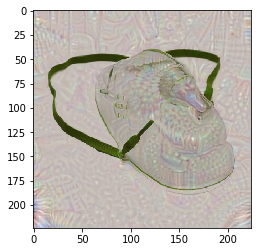

In [50]:
plt.imshow(to01(im_new[0]))
plt.show()

In [51]:
prob = model.predict(im_new)
vgg16.decode_predictions(prob)

[[('n02105855', 'Shetland_sheepdog', 1.0),
  ('n02106030', 'collie', 5.4735846e-08),
  ('n02086910', 'papillon', 2.5408209e-08),
  ('n02112018', 'Pomeranian', 1.5603554e-08),
  ('n02364673', 'guinea_pig', 7.1949975e-09)]]

In [59]:
layers = [2, 5, 9, 13, 17]

In [72]:
def numOfElements(layer_num):
    return model.layers[layer_num].output.shape[1].value * \
    model.layers[layer_num].output.shape[2].value * \
    model.layers[layer_num].output.shape[3].value

In [73]:
loss = model.output[:, 230]
#loss = K.variable(0.)
for layer in layers:
    loss += K.sum(K.square(model.layers[layer].output))/numOfElements(layer)

In [54]:
grad = K.gradients(loss, image)

In [55]:
find_grad = K.function([image], grad)

In [74]:
im_new = im.copy()
lr = 50
for i in range(10):
    grad_i = find_grad([im_new])[0]
    max_grad = np.max(np.abs(grad_i))
    im_new += lr * grad_i / max_grad

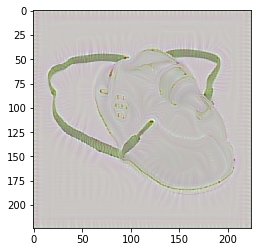

In [75]:
plt.imshow(to01(im_new[0]))
plt.show()

In [76]:
prob = model.predict(im_new)
vgg16.decode_predictions(prob)

[[('n04209133', 'shower_cap', 0.4603235),
  ('n03188531', 'diaper', 0.18806219),
  ('n04367480', 'swab', 0.15413174),
  ('n02834397', 'bib', 0.09989889),
  ('n03485794', 'handkerchief', 0.075818956)]]

In [124]:
im_style = load_img("mone.jpg", target_size=(224, 224))
im_style = img_to_array(im_style)
im_style = np.expand_dims(im_style, 0)
im_style = vgg16.preprocess_input(im_style)

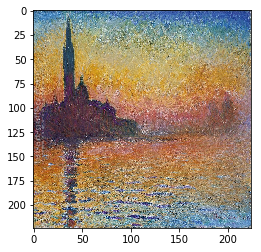

In [125]:
plt.imshow(to01(im_style[0]))

In [126]:
im_result = K.placeholder((1, 224, 224, 3))

In [86]:
im.shape

(1, 224, 224, 3)

In [127]:
im_result

<tf.Tensor 'Placeholder_65:0' shape=(1, 224, 224, 3) dtype=float32>

In [128]:
input_3 = K.concatenate([im, im_style, im_result], axis=0)

In [89]:
input_3

<tf.Tensor 'concat_1:0' shape=(3, 224, 224, 3) dtype=float32>

In [129]:
model_2 = vgg16.VGG16(input_tensor = input_3)

In [130]:
loss = K.variable(0.)
for layer in layers:
    tensor = model_2.layers[layer].output
    tensor_content = tensor[0]
    tensor_style = tensor[1]
    tensor_result = tensor[2]
    
    style_reshaped = K.reshape(tensor_style, (-1, tensor_style.shape[2]))
    style_reshaped_tr = K.transpose(style_reshaped)
    M_style = K.dot(style_reshaped_tr, style_reshaped)
    
    result_reshaped = K.reshape(tensor_result, (-1, tensor_result.shape[2]))
    result_reshaped_tr = K.transpose(result_reshaped)
    M_result = K.dot(result_reshaped_tr, result_reshaped)
    
    loss += K.mean(K.square(M_style - M_result))
    
    loss += K.mean(K.square(tensor_result - tensor_content))
    
    #loss += 100*K.mean(K.square(tensor_result - tensor_content))
    
tensor = model_2.layers[19].output
tensor_content = tensor[0]
tensor_style = tensor[1]
tensor_result = tensor[2]
#loss += 100*K.mean(K.square(tensor_result - tensor_content))
loss += K.mean(K.square(tensor_result - tensor_content))

In [141]:
img_nrows = 224
img_ncols = 224
def total_variation_loss(x):
    assert K.ndim(x) == 4
    if K.image_data_format() == 'channels_first':
        a = K.square(
            x[:, :, :img_nrows - 1, :img_ncols - 1] - x[:, :, 1:, :img_ncols - 1])
        b = K.square(
            x[:, :, :img_nrows - 1, :img_ncols - 1] - x[:, :, :img_nrows - 1, 1:])
    else:
        a = K.square(
            x[:, :img_nrows - 1, :img_ncols - 1, :] - x[:, 1:, :img_ncols - 1, :])
        b = K.square(
            x[:, :img_nrows - 1, :img_ncols - 1, :] - x[:, :img_nrows - 1, 1:, :])
    return K.sum(K.pow(a + b, 1.25))

In [142]:
loss += total_variation_loss(im_result)

In [143]:
loss

<tf.Tensor 'add_86:0' shape=() dtype=float32>

In [144]:
grad = K.gradients(loss, im_result)

In [145]:
find_grad = K.function([im_result], grad)

In [146]:
#im_new = np.random.randn(1, 224, 224, 3)
im_new = im_new
lr = 50
for i in range(10):
    grad_i = find_grad([im_new])[0]
    max_grad = np.max(np.abs(grad_i))
    im_new -= lr * grad_i / max_grad

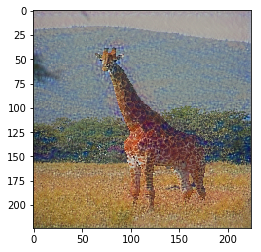

In [147]:
plt.imshow(to01(im_new[0]))
plt.show()

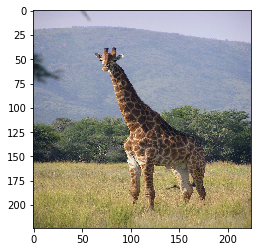

In [135]:
plt.imshow(to01(im[0]))
plt.show()